In [15]:
#Import Dependencies
import pandas as pd
import os
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#Save file locations as os independant locations
hrsa_file = os.path.join('County_Average_HRSA.csv')
death_rates_county = os.path.join ('Death_rates_by_county_df.csv')
death_rates_county_cap = os.path.join('Death_rates_by_county_per_capita.csv')
deaths_county = os.path.join('deaths_by_county_df.csv')
deaths_county_cap = os.path.join('deaths_by_county_per_capita.csv')
cases_county_cap = os.path.join('cases_by_county_per_capita.csv')
rates_by_county = os.path.join('rates_by_county_df.csv')
cases_by_county = os.path.join('cases_by_county_df.csv')

In [17]:
#Convert each to a dataframe
hrsa_df = pd.read_csv(hrsa_file)
death_rates_df = pd.read_csv(death_rates_county)
death_rates_county_cap_df = pd.read_csv(death_rates_county_cap)
deaths_county_df = pd.read_csv(deaths_county)
deaths_county_cap_df = pd.read_csv(deaths_county_cap)
cases_county_cap_df = pd.read_csv(cases_county_cap)
rates_by_county_df = pd.read_csv(rates_by_county)
cases_by_county_df = pd.read_csv(cases_by_county)

In [18]:
#remove spaces in the county name for cross data compatability
hrsa_df['County Name'] = hrsa_df['County Name'].str.replace(" ","")
#correct previous error of not indluding the index in the creation of the csv file
hrsa_df = hrsa_df.drop(columns=['Unnamed: 0'])

In [19]:
#remove spaces in the county name for cross data compatability
death_rates_df['County&State'] = death_rates_df['County&State'].str.replace(" ","")
death_rates_county_cap_df['County&State'] = death_rates_county_cap_df['County&State'].str.replace(" ","")
deaths_county_df['County&State'] = deaths_county_df['County&State'].str.replace(" ","")
deaths_county_cap_df['County&State'] = deaths_county_cap_df['County&State'].str.replace(" ","")
cases_county_cap_df['County&State'] = cases_county_cap_df['County&State'].str.replace(" ","")
rates_by_county_df['County&State'] = rates_by_county_df['County&State'].str.replace(" ","")
cases_by_county_df['County&State'] = cases_by_county_df['County&State'].str.replace(" ","")


In [20]:
#create new dataframes by merging all COVID data with HRSA data
dr_merge = pd.merge(death_rates_df, hrsa_df, how='inner', left_on='County&State', right_on='County Name')
drpcap_merge = pd.merge(death_rates_county_cap_df, hrsa_df, how='inner', left_on='County&State', right_on='County Name')
d_county_merge = pd.merge(deaths_county_df, hrsa_df, how='inner', left_on='County&State', right_on='County Name')
d_county_pcap_merge = pd.merge(deaths_county_cap_df, hrsa_df, how='inner', left_on='County&State', right_on='County Name')
cases_county_cap_merge = pd.merge(cases_county_cap_df, hrsa_df, how='inner', left_on='County&State', right_on='County Name')
rates_by_county_merge = pd.merge(rates_by_county_df, hrsa_df, how='inner', left_on='County&State', right_on='County Name')
cases_by_county_merge = pd.merge(cases_by_county_df, hrsa_df, how='inner', left_on='County&State', right_on='County Name')


In [21]:
#remove duplicate/unecessary columns (state and county as well as population for rate dataframes)
dr_merge = dr_merge.drop(columns=['State Name', 'County Name', 'population'])
drpcap_merge = drpcap_merge.drop(columns=['State Name', 'County Name', 'population'])
d_county_merge = d_county_merge.drop(columns=['State Name', 'County Name_y'])
d_county_pcap_merge = d_county_pcap_merge.drop(columns=['State Name', 'County Name'])
rates_by_county_merge = rates_by_county_merge.drop(columns=['State Name', 'County Name'])
cases_by_county_merge = cases_by_county_merge.drop(columns=['State Name', 'County Name_y'])

In [22]:
#rename duplicate column
d_county_merge = d_county_merge.rename(columns={"County Name_x": "County Name"})
cases_by_county_merge = cases_by_county_merge.rename(columns={"County Name_x": "County Name"})

     HPSA Score vs. Deaths per Capita


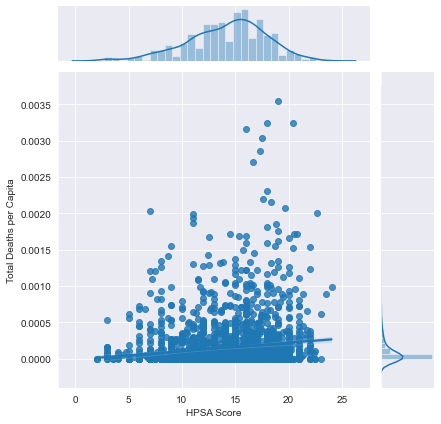

Interestingly, There is a positive correlation between the death rate per capita and the lack of healthcare
resources available in certain counties. The question now is if it will corrlate to prior analysis.


In [43]:
#Add Column for total deaths per resident
d_county_merge['Total Deaths per Capita'] = (d_county_merge['6/15/2020'] / (d_county_merge['population']))

fig = sns.jointplot(x='HPSA Score', y='Total Deaths per Capita', data=d_county_merge, kind="reg")
plt.savefig('HPSA_SCOREvsTotal_Deaths.png', dpi=150)
print('     HPSA Score vs. Deaths per Capita')

plt.show()
print('Interestingly, There is a positive correlation between the death rate per capita and the lack of healthcare')
print('resources available in certain counties. The question now is if it will corrlate to prior analysis.')

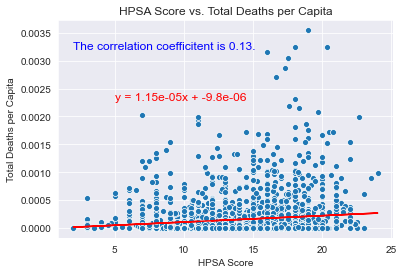

     HPSA Score vs. Deaths per Capita


In [44]:
x=d_county_merge['HPSA Score']
y=d_county_merge['Total Deaths per Capita']

sns.set_style('darkgrid')
sns.scatterplot(x, y).set_title('HPSA Score vs. Total Deaths per Capita')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,7)) + "x + " + str(round(intercept,7))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5, 0.0023), fontsize=12,color="red")

correlation = st.pearsonr(x,y)[0]

correlation = "The correlation coefficitent is " + str(round(correlation,2)) + "."
plt.annotate(correlation, (2,0.0032), fontsize=12,color="blue")
plt.savefig('HPSAScorevs.TotalDeathsperCapita.png', dpi=150)
plt.show()

print('     HPSA Score vs. Deaths per Capita')

       HPSA Score vs. Cases per Capita


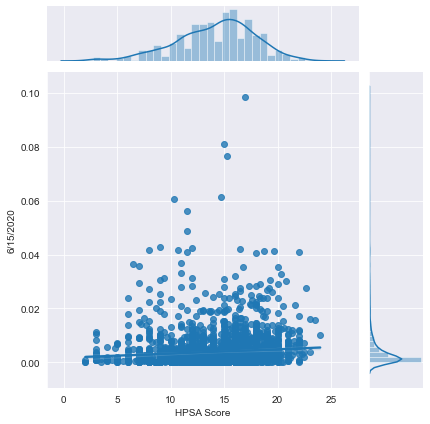

As one would expect, it seems that the cases themselves have less to do with the lack of healthcare.
it was an avenue worth exploring due to the fact that a lack of professionals could lead to
misinformation and therefore a higher transmission rate.
We can see that the outliers (with an 8-10% infection rate) do have higher scores.


In [45]:
fig = sns.jointplot(x='HPSA Score', y='6/15/2020', data=cases_county_cap_merge, kind="reg")
print('       HPSA Score vs. Cases per Capita')
plt.savefig('HPSA_SCOREvsTotal_Cases.png', dpi=150)
plt.show()
print('As one would expect, it seems that the cases themselves have less to do with the lack of healthcare.')
print('it was an avenue worth exploring due to the fact that a lack of professionals could lead to')
print('misinformation and therefore a higher transmission rate.')
print('We can see that the outliers (with an 8-10% infection rate) do have higher scores.')


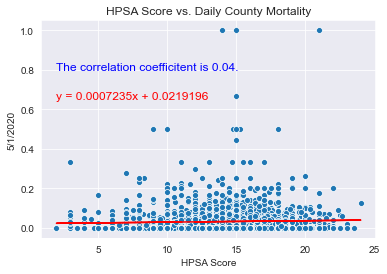

While it may look as though we have 3 different counties that have 100% mortality, that is not the case here.
because this data was calcultaed on a deaths on a particular day / cases on a particular day, this is indicating
that for each case that was confirmed on this day (May 1st), there was a death as well in the given county.


In [46]:
x=rates_by_county_merge['HPSA Score']
y=rates_by_county_merge['5/1/2020']

sns.set_style('darkgrid')
sns.scatterplot(x, y).set_title('HPSA Score vs. Daily County Mortality')

rates_by_county_merge['5/1/2020'] = rates_by_county_merge['5/1/2020'].fillna(0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,7)) + "x + " + str(round(intercept,7))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(2, 0.65), fontsize=12,color="red")



correlation = st.pearsonr(x,y)[0]

correlation = "The correlation coefficitent is " + str(round(correlation,2)) + "."
plt.annotate(correlation, (2,0.8), fontsize=12,color="blue")

plt.savefig('HPSAScorevs.DailyCountyMortality.png', dpi=150)

plt.show()
print('While it may look as though we have 3 different counties that have 100% mortality, that is not the case here.')
print('because this data was calcultaed on a deaths on a particular day / cases on a particular day, this is indicating')
print('that for each case that was confirmed on this day (May 1st), there was a death as well in the given county.')

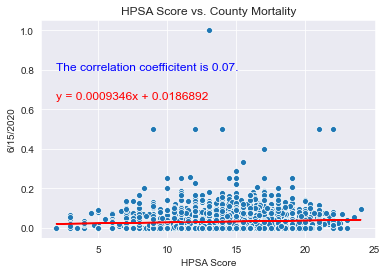

This method has seemed to weed out the majority of the outliers, however the sigle county with 100% mortality
most likely had a very few number of cases with all of them succumbing to the disease.


In [47]:
#Deaths per infection

# d_county_merge['6/15/2020'] = d_county_merge['6/15/2020'].fillna(0)
# cases_by_county_merge['6/15/2020'] = cases_by_county_merge['6/15/2020'].fillna(0)

x=cases_by_county_merge['HPSA Score']
y=(d_county_merge['6/15/2020'] / cases_by_county_merge['6/15/2020']).fillna(0)

sns.set_style('darkgrid')
sns.scatterplot(x, y).set_title('HPSA Score vs. County Mortality')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,7)) + "x + " + str(round(intercept,7))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(2, 0.65), fontsize=12,color="red")

correlation = st.pearsonr(x,y)[0]

correlation = "The correlation coefficitent is " + str(round(correlation,2)) + "."
plt.annotate(correlation, (2,0.8), fontsize=12,color="blue")

plt.savefig('HPSAScorevs.CountyMortality.png', dpi=150)

plt.show()

print('This method has seemed to weed out the majority of the outliers, however the sigle county with 100% mortality')
print('most likely had a very few number of cases with all of them succumbing to the disease.')